# D·ª∞ ƒêO√ÅN GI√Å V√Ä PH√ÇN C·ª§M KIM C∆Ø∆†NG

## IMPORT C√ÅC TH∆Ø VI·ªÜN C·∫¶N THI·∫æT 

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [327]:
df = pd.read_csv('diamond_full_data.csv')
df.head()

carat color clarity        cut table   depth    measurements   price
0   0.54     G     SI2  Excellent  58 %  62.2 %   5.2x5.22x3.24    $989
1   0.52     F     SI1  Excellent  57 %  62.1 %  5.13x5.15x3.19  $1,111
2   0.50     E     SI1  Excellent  60 %  60.8 %  5.09x5.13x3.11  $1,197
3   0.50     E     SI1  Excellent  61 %  60.7 %  5.13x5.15x3.12  $1,225
4   0.50     H     VS2  Excellent  57 %  63.3 %  5.03x5.06x3.19  $1,155

In [328]:
print(df.info())
print(df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11385 entries, 0 to 11384
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         11385 non-null  float64
 1   color         11385 non-null  object 
 2   clarity       11385 non-null  object 
 3   cut           11385 non-null  object 
 4   table         11385 non-null  object 
 5   depth         11385 non-null  object 
 6   measurements  11385 non-null  object 
 7   price         9107 non-null   object 
dtypes: float64(1), object(7)
memory usage: 711.7+ KB
None
carat              0
color              0
clarity            0
cut                0
table              0
depth              0
measurements       0
price           2278
dtype: int64


In [329]:
df.dropna(inplace=True)


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9107 entries, 0 to 11384
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         9107 non-null   float64
 1   color         9107 non-null   object 
 2   clarity       9107 non-null   object 
 3   cut           9107 non-null   object 
 4   table         9107 non-null   object 
 5   depth         9107 non-null   object 
 6   measurements  9107 non-null   object 
 7   price         9107 non-null   object 
dtypes: float64(1), object(7)
memory usage: 640.3+ KB


In [331]:
df.head()

carat color clarity        cut table   depth    measurements   price
0   0.54     G     SI2  Excellent  58 %  62.2 %   5.2x5.22x3.24    $989
1   0.52     F     SI1  Excellent  57 %  62.1 %  5.13x5.15x3.19  $1,111
2   0.50     E     SI1  Excellent  60 %  60.8 %  5.09x5.13x3.11  $1,197
3   0.50     E     SI1  Excellent  61 %  60.7 %  5.13x5.15x3.12  $1,225
4   0.50     H     VS2  Excellent  57 %  63.3 %  5.03x5.06x3.19  $1,155

In [332]:
df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)


df['table'] = df['table'].str.replace(' %', '').astype(float)
df['depth'] = df['depth'].str.replace(' %', '').astype(float)

df['measurements'] = df['measurements'].str.replace('X', 'x')
df[["x", "y", "z"]] = df["measurements"].str.split("x", expand=True)

# (Tu·ª≥ ch·ªçn) Xo√° c·ªôt measurements g·ªëc
df.drop(columns=["measurements"], inplace=True)

# (Tu·ª≥ ch·ªçn) ƒê·ªïi ki·ªÉu x, y, z v·ªÅ float
df[["x", "y", "z","depth","table","carat"]] = df[["x", "y", "z","depth","table","carat"]].astype(float)


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\quock\AppData\Local\Temp\ipykernel_35788\488478571.py:1: SyntaxWarning: invalid escape sequence '\$'
  df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)


In [333]:
df.head()

carat color clarity        cut  table  depth   price     x     y     z
0   0.54     G     SI2  Excellent   58.0   62.2   989.0  5.20  5.22  3.24
1   0.52     F     SI1  Excellent   57.0   62.1  1111.0  5.13  5.15  3.19
2   0.50     E     SI1  Excellent   60.0   60.8  1197.0  5.09  5.13  3.11
3   0.50     E     SI1  Excellent   61.0   60.7  1225.0  5.13  5.15  3.12
4   0.50     H     VS2  Excellent   57.0   63.3  1155.0  5.03  5.06  3.19

In [334]:
df.describe()

carat        table        depth          price            x  \
count  9107.000000  9107.000000  9107.000000    9107.000000  9107.000000   
mean      0.924654    57.624245    62.103635    6022.932799     6.044038   
std       0.574320     1.504228     1.087881   18865.958721     0.937442   
min       0.500000    53.000000    57.400000     461.000000     4.890000   
25%       0.590000    57.000000    61.500000    1431.000000     5.370000   
50%       0.800000    58.000000    62.400000    2663.000000     5.890000   
75%       1.010000    59.000000    62.700000    4985.500000     6.380000   
max      10.290000    64.000000    65.300000  981619.000000    13.850000   

                 y            z  
count  9107.000000  9107.000000  
mean      6.078621     3.766365  
std       0.944968     0.599476  
min       4.950000     3.020000  
25%       5.400000     3.310000  
50%       5.930000     3.680000  
75%       6.410000     4.000000  
max      13.930000     8.680000

### CHIA TRAIN V√Ä TEST

In [335]:
df[df["y"] == 0].index

Index([], dtype='int64')

### PRICE
#### ‚úÖ ∆Øu ƒëi·ªÉm sau log-transform:

| **Y·∫øu t·ªë**              | **Tr∆∞·ªõc log-transform (price)** | **Sau log-transform (log(price))**     |
|-------------------------|----------------------------------|----------------------------------------|
| **Skewness**            | L·ªách ph·∫£i m·∫°nh                   | G·∫ßn chu·∫©n h∆°n                          |
| **Hi·ªÉn th·ªã chi ti·∫øt**   | B·ªã n√©n ph·∫ßn th·∫•p                 | Tr·∫£i ƒë·ªÅu, d·ªÖ nh√¨n h∆°n                  |
| **Quan s√°t ph√¢n c·ª•m**   | Kh√¥ng r√µ r√†ng                    | C√≥ th·ªÉ th·∫•y ƒë∆∞·ª£c **2 c·ª•m gi√°**         |

* M·ªôt mode ch√≠nh n·∫±m kho·∫£ng log(price) ‚âà 7.5 (t∆∞∆°ng ƒë∆∞∆°ng v·ªõi kho·∫£ng 1,800 USD).

* M·ªôt mode ph·ª• nh·ªè h∆°n ·ªü kho·∫£ng log(price) ‚âà 8.5 (t∆∞∆°ng ƒë∆∞∆°ng 5,000 USD).




In [336]:
df['log_price'] = np.log(df['price'])

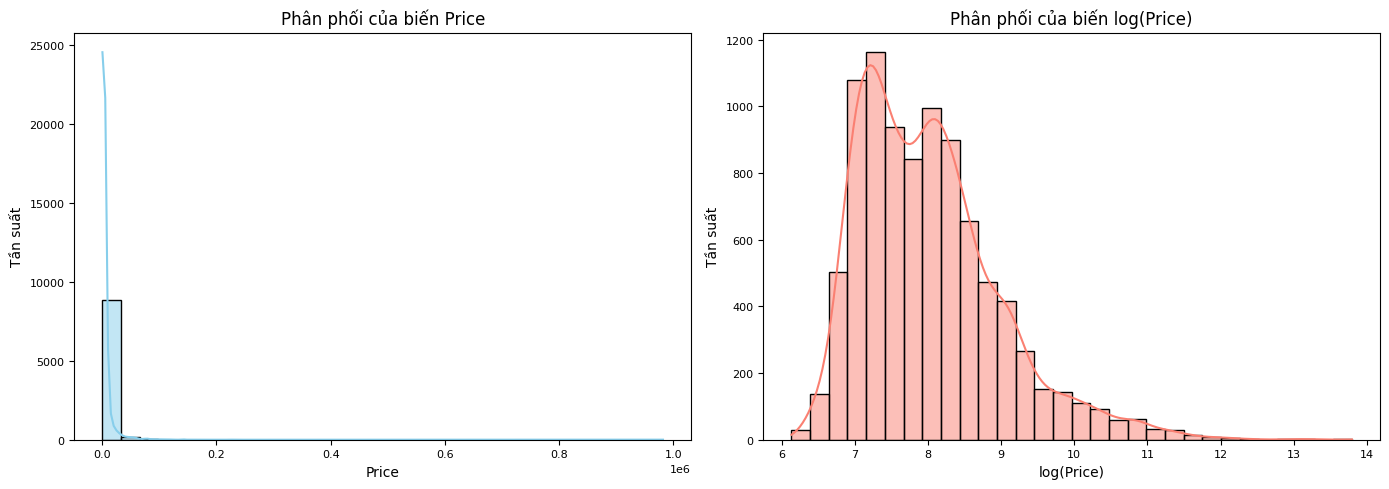

In [337]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# T·∫°o th√™m c·ªôt log_price
df['log_price'] = np.log(df['price'])

# V·∫Ω 2 bi·ªÉu ƒë·ªì c·∫°nh nhau
plt.figure(figsize=(14, 5))

# Bi·ªÉu ƒë·ªì g·ªëc - Price
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='price', kde=True, bins=30, color='skyblue')
plt.title('Ph√¢n ph·ªëi c·ªßa bi·∫øn Price')
plt.xlabel('Price')
plt.ylabel('T·∫ßn su·∫•t')

# Bi·ªÉu ƒë·ªì log-transform
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='log_price', kde=True, bins=30, color='salmon')
plt.title('Ph√¢n ph·ªëi c·ªßa bi·∫øn log(Price)')
plt.xlabel('log(Price)')
plt.ylabel('T·∫ßn su·∫•t')

plt.tight_layout()
plt.show()


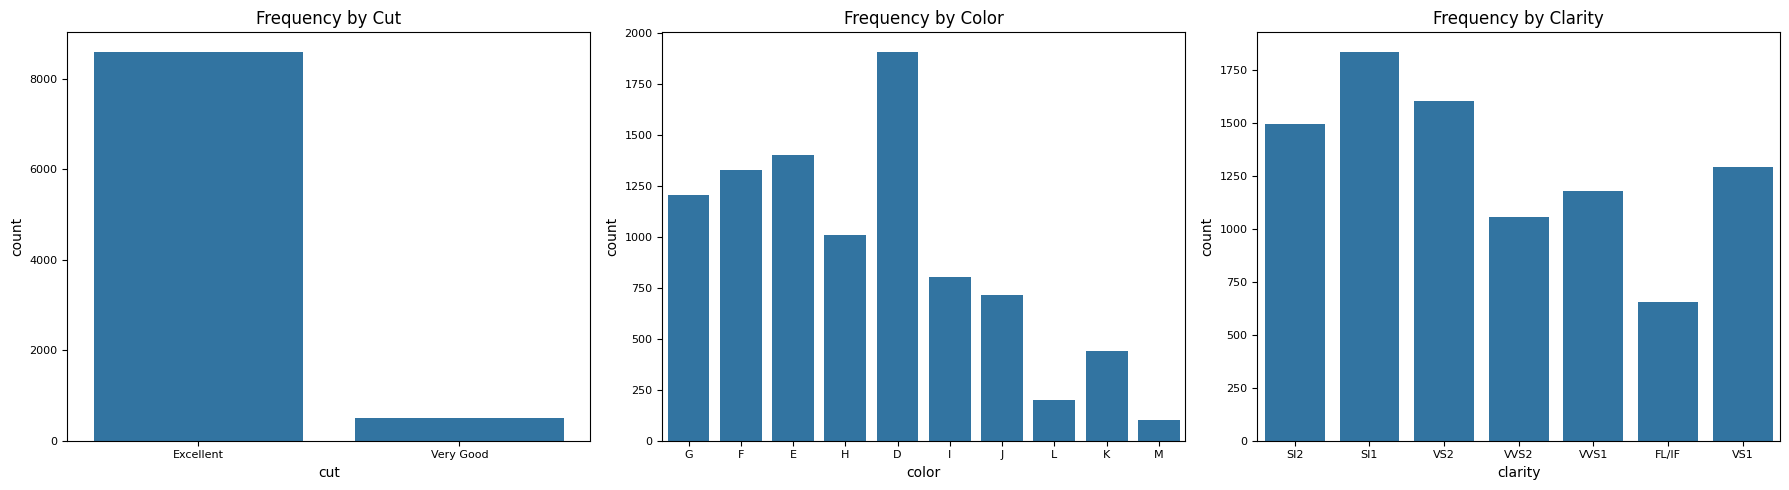

In [338]:

plt.figure(figsize=(18, 5))

# Countplot theo 'cut'
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='cut')
plt.title('Frequency by Cut')

# Countplot theo 'color'
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='color')
plt.title('Frequency by Color')

# Countplot theo 'clarity'
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='clarity')
plt.title('Frequency by Clarity')

plt.tight_layout()
plt.show()



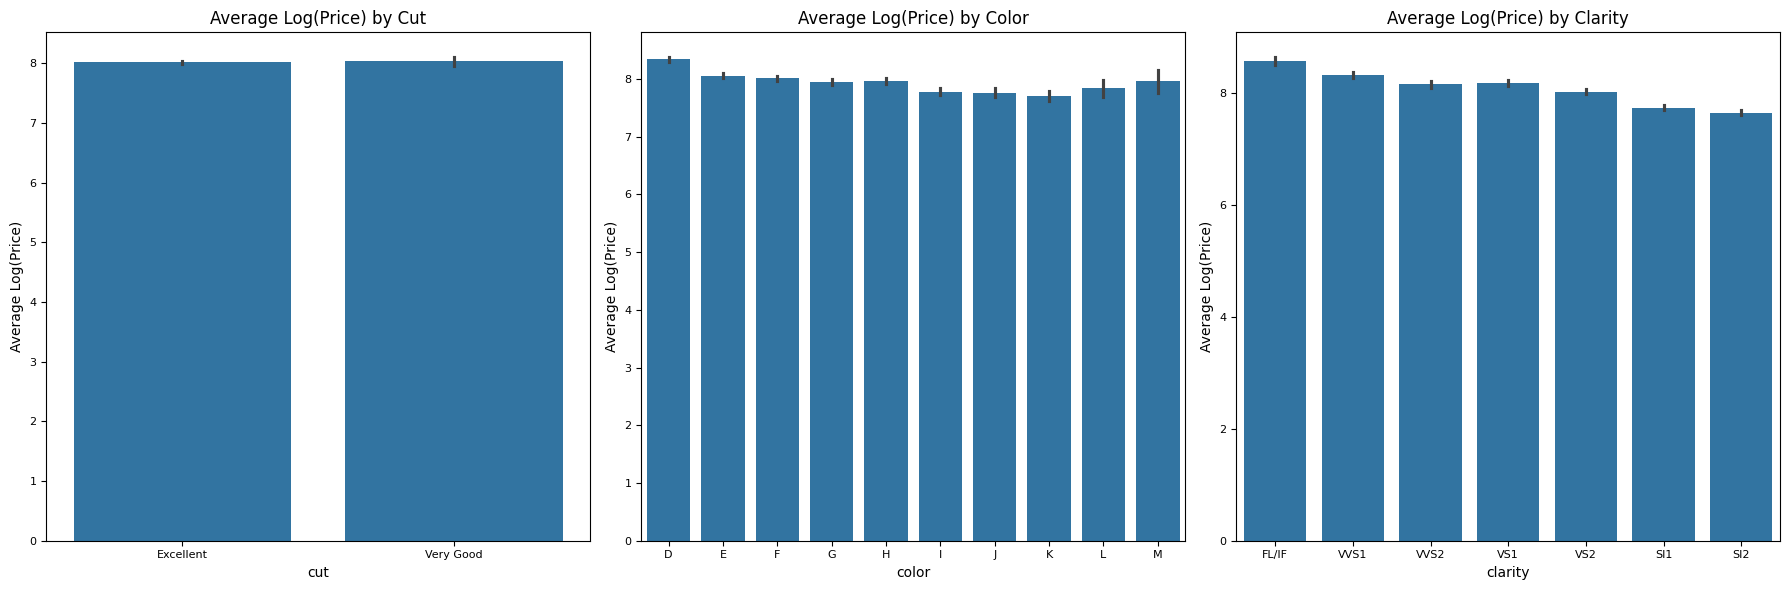

In [339]:
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']
clarity_order = ['FL/IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2']
plt.figure(figsize=(18, 6))

# Barplot c·ªßa trung b√¨nh log(price) theo 'cut'
plt.subplot(1, 3, 1)
sns.barplot(data=df, x='cut', y='log_price', estimator=np.mean)
plt.title('Average Log(Price) by Cut')
plt.ylabel('Average Log(Price)')

# Barplot c·ªßa trung b√¨nh log(price) theo 'color'
plt.subplot(1, 3, 2)
sns.barplot(data=df, x='color', y='log_price', estimator=np.mean, order=color_order)
plt.title('Average Log(Price) by Color')
plt.ylabel('Average Log(Price)')

# Barplot c·ªßa trung b√¨nh log(price) theo 'clarity'
plt.subplot(1, 3, 3)
sns.barplot(data=df, x='clarity', y='log_price', estimator=np.mean,  order=clarity_order)
plt.title('Average Log(Price) by Clarity')
plt.ylabel('Average Log(Price)')

plt.tight_layout()
plt.show()

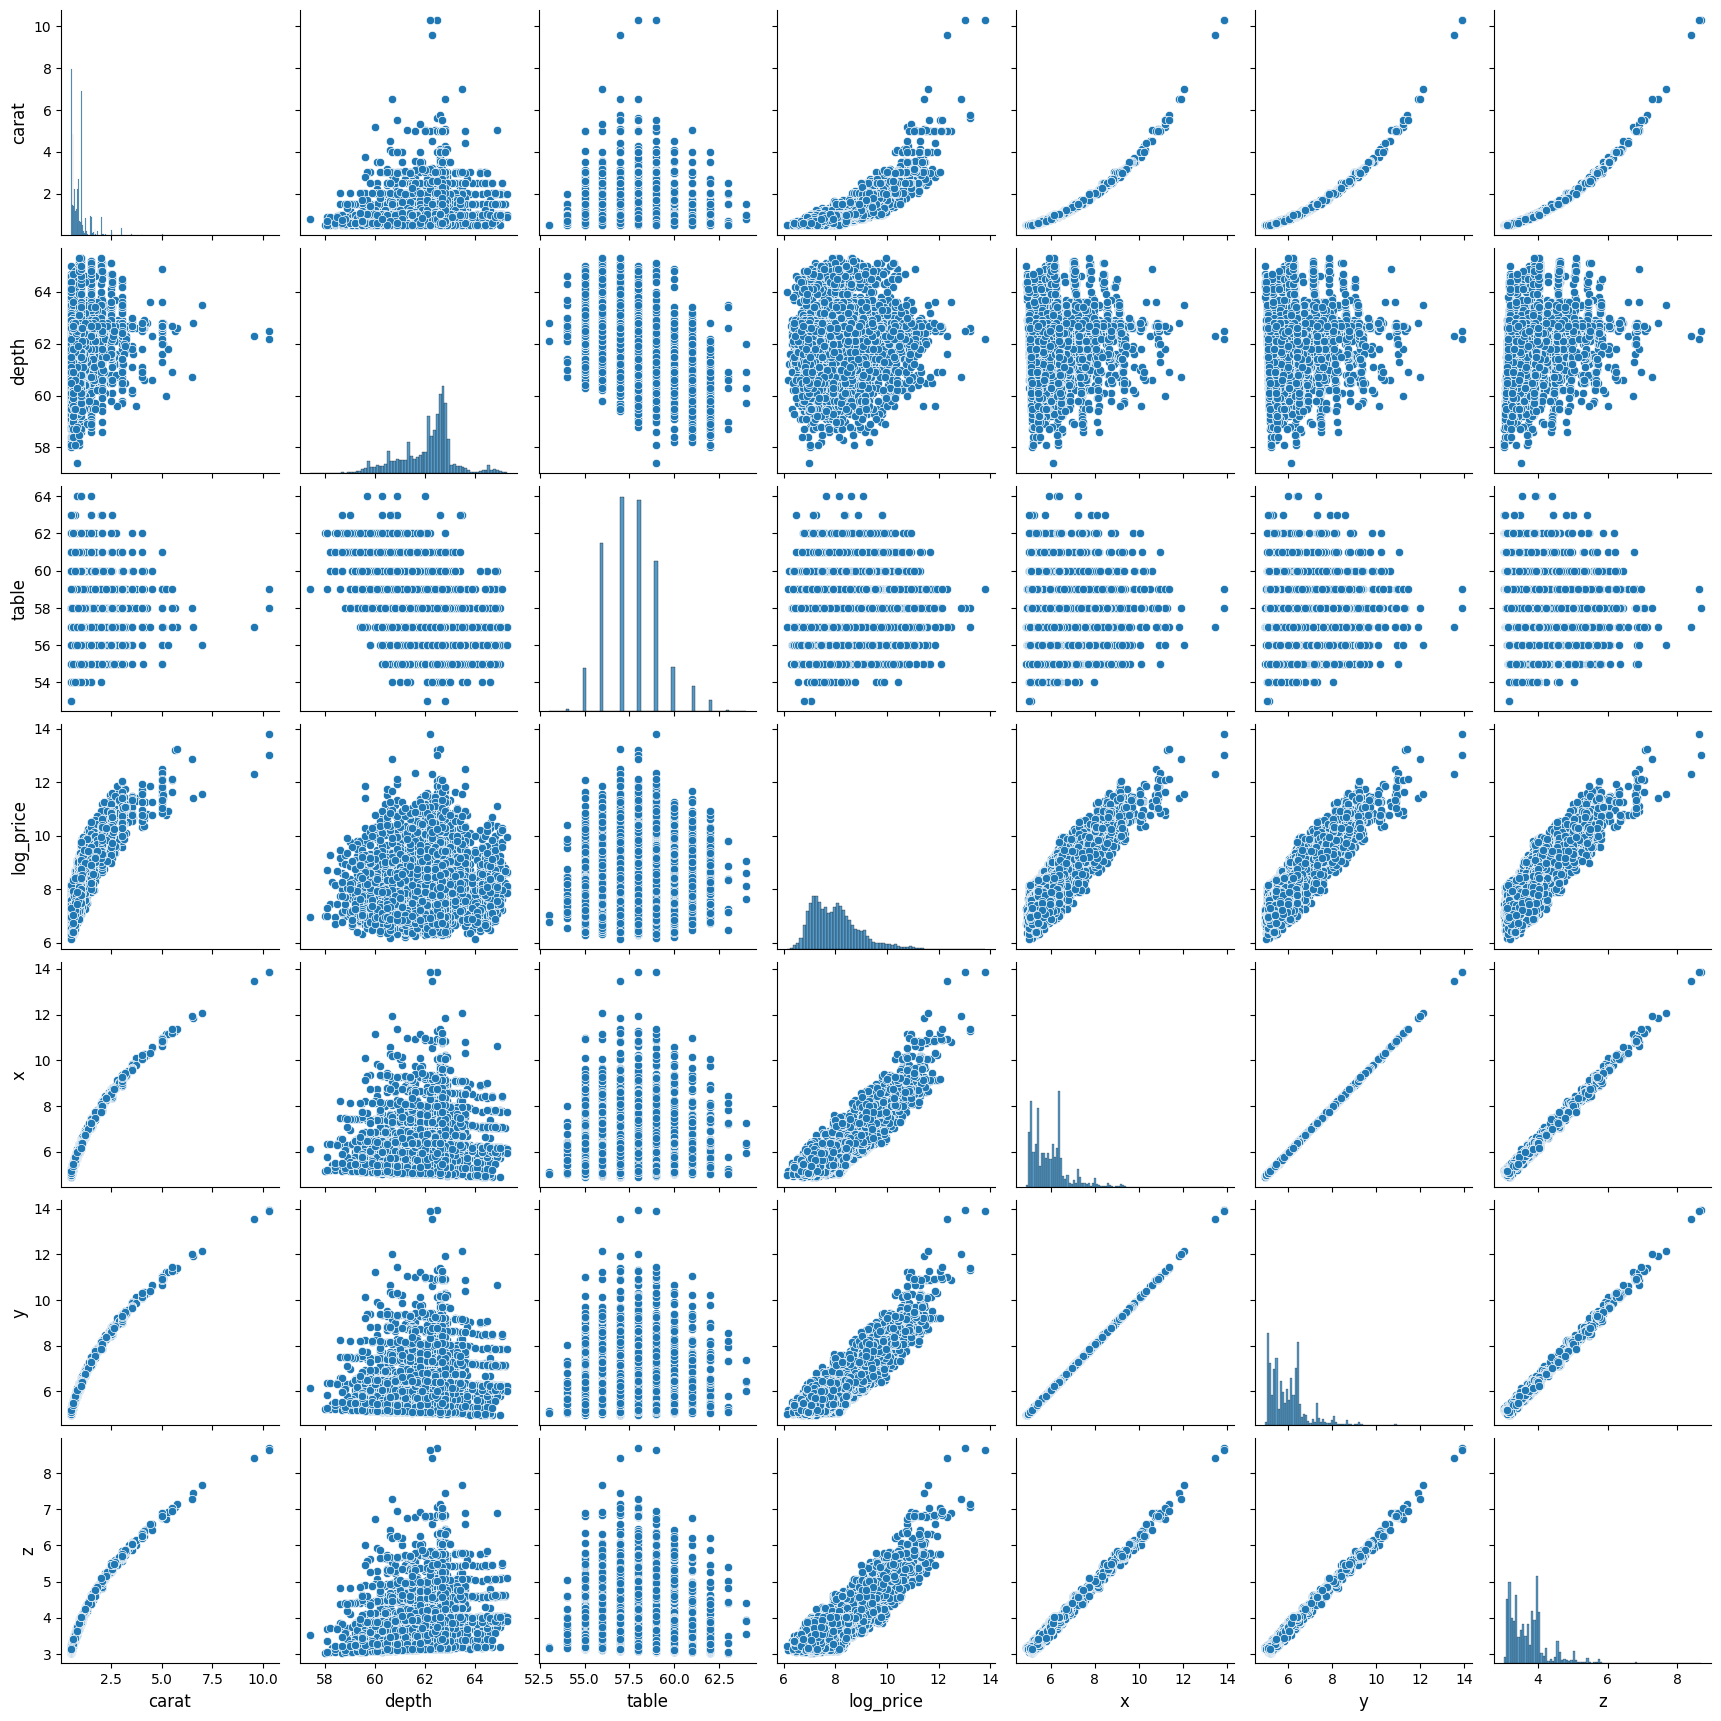

In [340]:
# Ch·ªçn c√°c c·ªôt li√™n t·ª•c


plt.rcParams['axes.labelsize'] = 12 # K√≠ch th∆∞·ªõc font cho nh√£n tr·ª•c x v√† y
plt.rcParams['xtick.labelsize'] = 10 # K√≠ch th∆∞·ªõc font cho c√°c s·ªë tr√™n tr·ª•c x
plt.rcParams['ytick.labelsize'] = 10 # K√≠ch th∆∞·ªõc font cho c√°c s·ªë tr√™n tr·ª•c y
continuous_vars = ['carat', 'depth', 'table', 'log_price', 'x', 'y', 'z']
sns.pairplot(df[continuous_vars])
plt.show()



In [341]:
df.head()

carat color clarity        cut  table  depth   price     x     y     z  \
0   0.54     G     SI2  Excellent   58.0   62.2   989.0  5.20  5.22  3.24   
1   0.52     F     SI1  Excellent   57.0   62.1  1111.0  5.13  5.15  3.19   
2   0.50     E     SI1  Excellent   60.0   60.8  1197.0  5.09  5.13  3.11   
3   0.50     E     SI1  Excellent   61.0   60.7  1225.0  5.13  5.15  3.12   
4   0.50     H     VS2  Excellent   57.0   63.3  1155.0  5.03  5.06  3.19   

   log_price  
0   6.896694  
1   7.013016  
2   7.087574  
3   7.110696  
4   7.051856

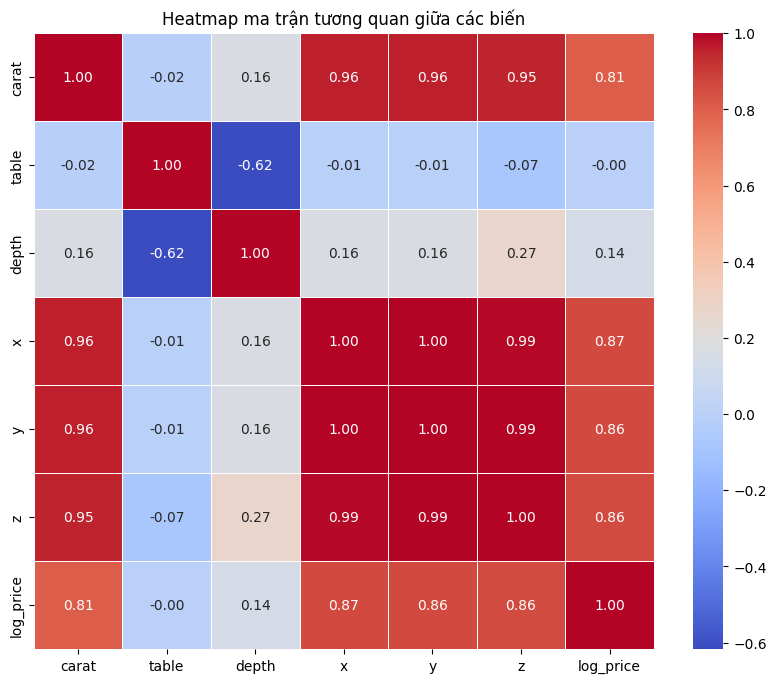

In [342]:
import seaborn as sns
import matplotlib.pyplot as plt

# T√≠nh ma tr·∫≠n t∆∞∆°ng quan
corr = df.drop(['price'],axis =1).corr(numeric_only=True)

# V·∫Ω heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn')
plt.show()


### ƒêa c·ªông tuy·∫øn 

In [343]:


# Gi·∫£ s·ª≠ df l√† DataFrame ch·ª©a d·ªØ li·ªáu c·ªßa b·∫°n
X = df[['carat','x','y','z']]

# Th√™m c·ªôt h·∫±ng s·ªë (intercept)
X = sm.add_constant(X)

In [344]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print(vif_data)

  Variable          VIF
0    const   302.995827
1    carat    12.475251
2        x  6166.526346
3        y  6663.579132
4        z    92.454413


In [345]:
df.drop(columns=["carat", "y", "z"], inplace=True)

So s√°nh ph√¢n b·ªë c·ªßa bi·∫øn li√™n t·ª•c gi·ªØa Train v√† Test set:


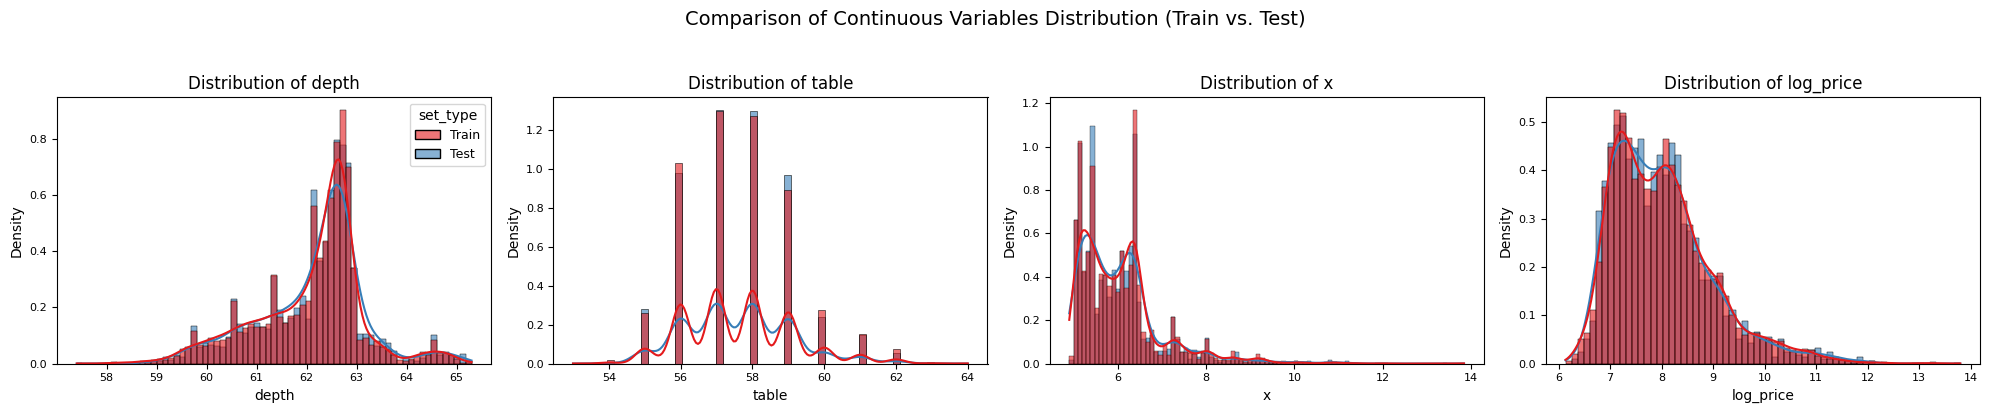


So s√°nh ph√¢n b·ªë c·ªßa bi·∫øn danh m·ª•c gi·ªØa Train v√† Test set:


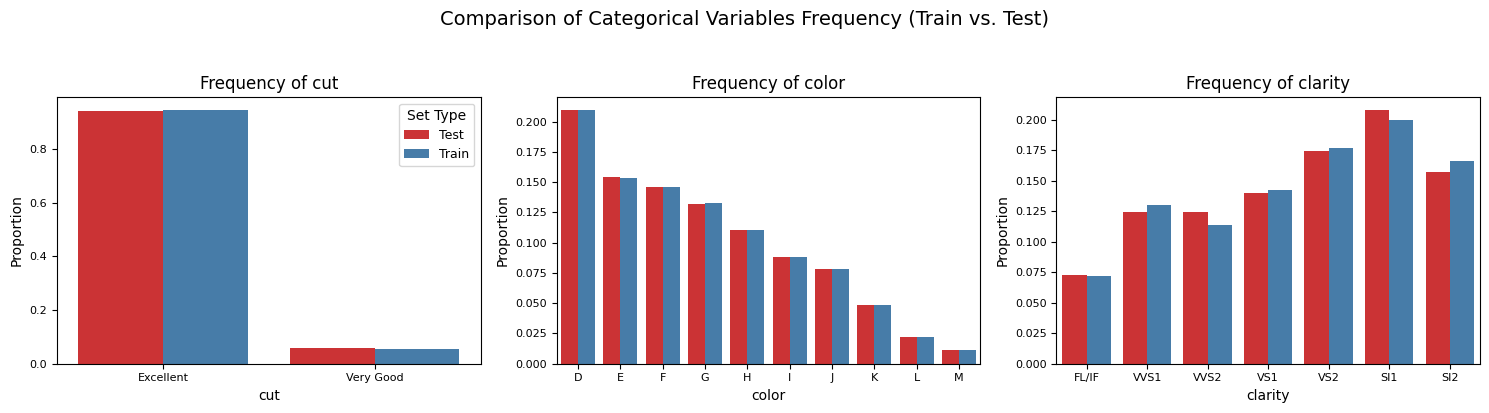

In [346]:
df_viz = df.copy() # T·∫°o m·ªôt b·∫£n sao ƒë·ªÉ th√™m c·ªôt '_set_type' m√† kh√¥ng ·∫£nh h∆∞·ªüng ƒë·∫øn df g·ªëc

X = df_viz.drop(['price', 'log_price'], axis=1) # C√°c bi·∫øn ƒë·ªôc l·∫≠p
y = df_viz['log_price'] # Bi·∫øn m·ª•c ti√™u

# Ph√¢n t·∫ßng theo 'color'
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=X['color']
)

# G·∫Øn l·∫°i bi·∫øn m·ª•c ti√™u v√†o X_train v√† X_test ƒë·ªÉ d·ªÖ d√†ng visualize
X_train['log_price'] = y_train
X_test['log_price'] = y_test

# Th√™m c·ªôt nh·∫≠n d·∫°ng 'set_type' v√†o m·ªói t·∫≠p ƒë·ªÉ ph√¢n bi·ªát khi v·∫Ω
X_train['set_type'] = 'Train'
X_test['set_type'] = 'Test'

# N·ªëi l·∫°i X_train v√† X_test ƒë·ªÉ v·∫Ω bi·ªÉu ƒë·ªì so s√°nh d·ªÖ d√†ng h∆°n
combined_df = pd.concat([X_train, X_test])

# --- Danh s√°ch c√°c bi·∫øn ƒë·ªÉ v·∫Ω bi·ªÉu ƒë·ªì ---
categorical_vars = ['cut', 'color', 'clarity']
continuous_vars = ['depth', 'table', 'x', 'log_price']

# --- ƒê·∫∑t l·∫°i k√≠ch th∆∞·ªõc font cho c√°c nh√£n bi·ªÉu ƒë·ªì ---
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['legend.fontsize'] = 9 # K√≠ch th∆∞·ªõc font cho legend

# --- C√†i ƒë·∫∑t palette m√†u s·∫Øc t∆∞∆°ng ph·∫£n r√µ r√†ng ---
custom_palette = sns.color_palette("Set1", n_colors=2) # V√≠ d·ª•: m√†u ƒë·ªè v√† xanh

# --- V·∫Ω bi·ªÉu ƒë·ªì cho bi·∫øn li√™n t·ª•c (Histogram) tr√™n c√πng m·ªôt Figure ---
print("So s√°nh ph√¢n b·ªë c·ªßa bi·∫øn li√™n t·ª•c gi·ªØa Train v√† Test set:")
# X√°c ƒë·ªãnh s·ªë l∆∞·ª£ng h√†ng v√† c·ªôt cho subplot
num_cont_vars = len(continuous_vars)
n_cols_cont = 4 # S·ªë c·ªôt b·∫°n mu·ªën hi·ªÉn th·ªã
n_rows_cont = (num_cont_vars + n_cols_cont - 1) // n_cols_cont # T√≠nh s·ªë h√†ng c·∫ßn thi·∫øt

fig_cont, axes_cont = plt.subplots(n_rows_cont, n_cols_cont, figsize=(5 * n_cols_cont, 4 * n_rows_cont))
axes_cont = axes_cont.flatten() # Bi·∫øn ƒë·ªïi m·∫£ng axes 2D th√†nh 1D ƒë·ªÉ d·ªÖ l·∫∑p

for i, var in enumerate(continuous_vars):
    ax = axes_cont[i]
    sns.histplot(data=combined_df, x=var, hue='set_type', kde=True, palette=custom_palette,
                 stat='density', common_norm=False, ax=ax, alpha=0.6) # Th√™m alpha ƒë·ªÉ d·ªÖ nh√¨n khi ch·ªìng l√™n
    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Density')
    
    if i != 0: # X√≥a legend ·ªü c√°c subplot c√≤n l·∫°i sau khi ƒë√£ ƒë·∫∑t ti√™u ƒë·ªÅ cho c√°i ƒë·∫ßu ti√™n
            ax.get_legend().remove()

# X√≥a c√°c subplot tr·ªëng n·∫øu c√≥
for j in range(i + 1, len(axes_cont)):
    fig_cont.delaxes(axes_cont[j])

plt.suptitle('Comparison of Continuous Variables Distribution (Train vs. Test)', y=1.02, fontsize=14) # Ti√™u ƒë·ªÅ chung cho figure
plt.tight_layout(rect=[0, 0, 1, 0.98]) # ƒêi·ªÅu ch·ªânh layout ƒë·ªÉ kh√¥ng b·ªã c·∫Øt ti√™u ƒë·ªÅ
plt.show()

# --- V·∫Ω bi·ªÉu ƒë·ªì cho bi·∫øn danh m·ª•c (Barplot v·ªõi t·∫ßn s·ªë) tr√™n c√πng m·ªôt Figure ---
print("\nSo s√°nh ph√¢n b·ªë c·ªßa bi·∫øn danh m·ª•c gi·ªØa Train v√† Test set:")
num_cat_vars = len(categorical_vars)
n_cols_cat = 3
n_rows_cat = (num_cat_vars + n_cols_cat - 1) // n_cols_cat

fig_cat, axes_cat = plt.subplots(n_rows_cat, n_cols_cat, figsize=(5 * n_cols_cat, 4 * n_rows_cat))
axes_cat = axes_cat.flatten()

for i, var in enumerate(categorical_vars):
    ax = axes_cat[i]

    # T√≠nh to√°n t·∫ßn s·ªë (t·ª∑ l·ªá ph·∫ßn trƒÉm)
    # Group by var v√† set_type, sau ƒë√≥ t√≠nh s·ªë l∆∞·ª£ng v√† chuy·ªÉn th√†nh t·ª∑ l·ªá
    df_freq = combined_df.groupby('set_type')[var].value_counts(normalize=True).rename('proportion').reset_index()

    # S·∫Øp x·∫øp c√°c c·∫•p ƒë·ªô cho d·ªÖ nh√¨n n·∫øu l√† bi·∫øn ordinal
    order = None
    if var == 'color':
        order = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']
    elif var == 'clarity':
        order = ['FL/IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2'] # ƒê·∫£m b·∫£o th√™m I1, I2, I3 n·∫øu c√≥
    elif var == 'cut':
        order = ['Excellent', 'Very Good'] # ƒê·∫£m b·∫£o th√™m c√°c lo·∫°i kh√°c n·∫øu c√≥

    sns.barplot(data=df_freq, x=var, y='proportion', hue='set_type', palette=custom_palette, order=order, ax=ax)
    ax.set_title(f'Frequency of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Proportion')
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') # Xoay nh√£n n·∫øu c·∫ßn
    if i == 0: # Ch·ªâ hi·ªÉn th·ªã legend cho subplot ƒë·∫ßu ti√™n
        ax.legend(title='Set Type')
    else:
        ax.get_legend().remove() # X√≥a legend ·ªü c√°c subplot c√≤n l·∫°i

# X√≥a c√°c subplot tr·ªëng n·∫øu c√≥
for j in range(i + 1, len(axes_cat)):
    fig_cat.delaxes(axes_cat[j])

plt.suptitle('Comparison of Categorical Variables Frequency (Train vs. Test)', y=1.02, fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [347]:
X = df.drop(['price', 'log_price'], axis=1)
y = df['log_price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=X['color']
)
numerical_cols = ['x', 'depth', 'table']
categorical_cols = ['cut', 'color', 'clarity'] 

In [348]:
cut_categories = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
color_categories = ['M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D'] # T·ª´ k√©m nh·∫•t (0) ƒë·∫øn t·ªët nh·∫•t (9)
clarity_categories = ['SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'FL/IF'] # T·ª´ k√©m nh·∫•t (0) ƒë·∫øn t·ªët nh·∫•t (6)

scaler = StandardScaler()

# Kh·ªüi t·∫°o OrdinalEncoder cho t·ª´ng c·ªôt danh m·ª•c
# Ch√∫ng ta s·∫Ω x·ª≠ l√Ω t·ª´ng c·ªôt ri√™ng bi·ªát
encoder_cut = OrdinalEncoder(categories=[cut_categories], handle_unknown='use_encoded_value', unknown_value=-1)
encoder_color = OrdinalEncoder(categories=[color_categories], handle_unknown='use_encoded_value', unknown_value=-1)
encoder_clarity = OrdinalEncoder(categories=[clarity_categories], handle_unknown='use_encoded_value', unknown_value=-1)


# 2. FIT (H·ªçc tham s·ªë) tr√™n X_train v√† TRANSFORM cho c·∫£ X_train v√† X_test

# --- X·ª≠ l√Ω bi·∫øn li√™n t·ª•c ---
print("Processing numerical columns...")
# Fit scaler tr√™n X_train c·ªßa c√°c c·ªôt s·ªë
scaler.fit(X_train[numerical_cols])

# Transform X_train v√† X_test s·ª≠ d·ª•ng scaler ƒë√£ fit
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
print("Numerical columns processed.\n")

# --- X·ª≠ l√Ω bi·∫øn danh m·ª•c ---
print("Processing categorical columns...")

# Fit v√† Transform cho 'cut'
encoder_cut.fit(X_train[['cut']])
X_train['cut'] = encoder_cut.transform(X_train[['cut']])
X_test['cut'] = encoder_cut.transform(X_test[['cut']])

# Fit v√† Transform cho 'color'
encoder_color.fit(X_train[['color']])
X_train['color'] = encoder_color.transform(X_train[['color']])
X_test['color'] = encoder_color.transform(X_test[['color']])

# Fit v√† Transform cho 'clarity'
encoder_clarity.fit(X_train[['clarity']])
X_train['clarity'] = encoder_clarity.transform(X_train[['clarity']])
X_test['clarity'] = encoder_clarity.transform(X_test[['clarity']])

print("Categorical columns processed.\n")


# --- Ki·ªÉm tra k·∫øt qu·∫£ ---
print("--- X_train sau ti·ªÅn x·ª≠ l√Ω ---")
print(X_train.head())
print(f"Shape: {X_train.shape}\n")

print("--- X_test sau ti·ªÅn x·ª≠ l√Ω ---")
print(X_test.head())
print(f"Shape: {X_test.shape}\n")

# Ki·ªÉm tra mean v√† std c·ªßa c√°c c·ªôt s·ªë trong X_train (n√™n g·∫ßn 0 v√† 1)
print("Ki·ªÉm tra trung b√¨nh v√† ƒë·ªô l·ªách chu·∫©n c·ªßa c√°c c·ªôt s·ªë trong X_train:")
print(X_train[numerical_cols].mean())
print(X_train[numerical_cols].std())

print("\nKi·ªÉm tra trung b√¨nh v√† ƒë·ªô l·ªách chu·∫©n c·ªßa c√°c c·ªôt s·ªë trong X_test (c√≥ th·ªÉ kh√¥ng ch√≠nh x√°c 0 v√† 1 nh∆∞ng g·∫ßn):")
print(X_test[numerical_cols].mean())
print(X_test[numerical_cols].std())

print("\nKi·ªÉm tra gi√° tr·ªã m√£ h√≥a c·ªßa bi·∫øn danh m·ª•c trong X_train (xem c√°c s·ªë nguy√™n ƒë√£ g√°n):")
print(X_train[categorical_cols].head())

Processing numerical columns...
Numerical columns processed.

Processing categorical columns...
Categorical columns processed.

--- X_train sau ti·ªÅn x·ª≠ l√Ω ---
      color  clarity  cut     table     depth         x
4101    7.0      2.0  4.0  2.885633 -0.087444 -1.071687
3146    7.0      3.0  4.0 -1.073406  0.187454 -0.763070
7106    8.0      5.0  4.0  0.246274  0.553986 -1.007835
1892    7.0      4.0  4.0  1.565953 -1.736837  0.492683
721     3.0      5.0  4.0  0.906114 -1.920103 -0.646008
Shape: (7285, 6)

--- X_test sau ti·ªÅn x·ª≠ l√Ω ---
       color  clarity  cut     table     depth         x
10048    3.0      0.0  4.0  0.906114 -0.179077  0.375621
9120     1.0      1.0  4.0 -1.073406 -0.270710  5.451842
9074     8.0      1.0  3.0  2.885633  0.645619 -0.028773
10259    9.0      1.0  4.0 -0.413566  0.462353 -0.752428
9891     7.0      1.0  4.0  0.906114 -2.286635 -0.624724
Shape: (1822, 6)

Ki·ªÉm tra trung b√¨nh v√† ƒë·ªô l·ªách chu·∫©n c·ªßa c√°c c·ªôt s·ªë trong X_train:
x 

In [349]:

# df_encoded = pd.get_dummies(df, columns=["cut", "color", "clarity"], drop_first=True)

# # B∆∞·ªõc 3: T√°ch X v√† y
# X = df_encoded.drop(columns="price")
# y = df_encoded["price"]

# # B∆∞·ªõc 4: L·∫•y m·∫´u ph√¢n t·∫ßng (stratified sampling) theo 'cut'
# # V√¨ cut ƒë√£ b·ªã encode n√™n ta c·∫ßn t√°ch ra label tr∆∞·ªõc khi encode ƒë·ªÉ d√πng cho ph√¢n t·∫ßng
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, 
#     test_size=0.2, 
#     random_state=42, 
#     # stratify=df["cut"],  # Ph√¢n t·∫ßng theo 'cut'
    
# )

# (T√πy ch·ªçn) B∆∞·ªõc 5: Chu·∫©n h√≥a d·ªØ li·ªáu n·∫øu mu·ªën
# Kh√¥ng c·∫ßn thi·∫øt cho Random Forest, nh∆∞ng c√≥ th·ªÉ b·∫≠t n·∫øu d√πng Linear Regression
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# B∆∞·ªõc 6: Hu·∫•n luy·ªán m√¥ h√¨nh Random Forest
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)
feature_importances = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("--- T·∫ßm quan tr·ªçng c·ªßa c√°c ƒë·∫∑c tr∆∞ng (Feature Importances) ---")
print(importance_df)

# B∆∞·ªõc 7: D·ª± ƒëo√°n v√† ƒë√°nh gi√°
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"üìâ RMSE: {rmse:.2f}")
print(f"üìà R¬≤ score: {r2:.4f}")

--- T·∫ßm quan tr·ªçng c·ªßa c√°c ƒë·∫∑c tr∆∞ng (Feature Importances) ---
   Feature  Importance
5        x    0.790397
0    color    0.106342
1  clarity    0.093095
4    depth    0.006766
3    table    0.003102
2      cut    0.000299
üìâ RMSE: 0.14
üìà R¬≤ score: 0.9778


In [350]:
model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# 6. D·ª± ƒëo√°n v√† ƒë√°nh gi√°
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"üìâ RMSE: {rmse:.2f}")
print(f"üìà R¬≤ score: {r2:.4f}")

üìâ RMSE: 0.13
üìà R¬≤ score: 0.9804


In [351]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"üìâ RMSE: {rmse:.2f}")
print(f"üìà R¬≤ score: {r2:.4f}")

üìâ RMSE: 0.21
üìà R¬≤ score: 0.9520


### PH√ÇN C·ª§M

In [352]:
features = ['carat','depth', 'table', 'log_price']
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])


KeyError: "['carat'] not in index"

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters


In [ ]:
df.groupby('cluster')[features].mean()


carat      depth      table  log_price
cluster                                           
0        0.731459  60.891815  59.178974   7.690502
1        0.805967  62.645881  56.849577   7.844317
2        2.203467  62.519457  57.557609   9.987879

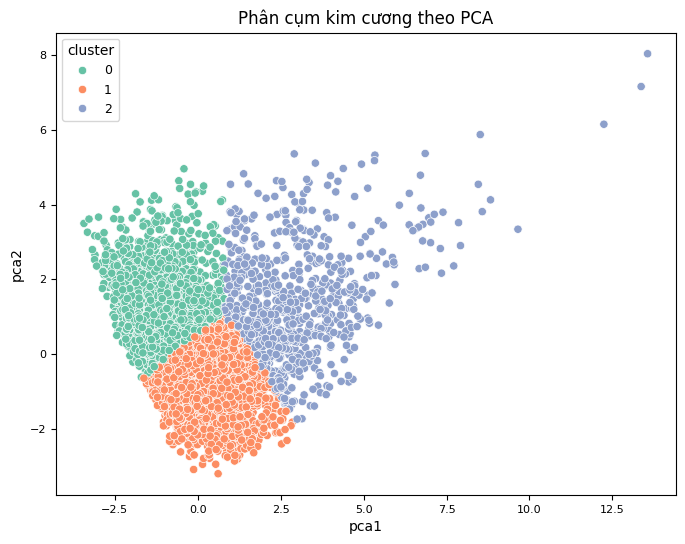

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('Ph√¢n c·ª•m kim c∆∞∆°ng theo PCA')
plt.show()
